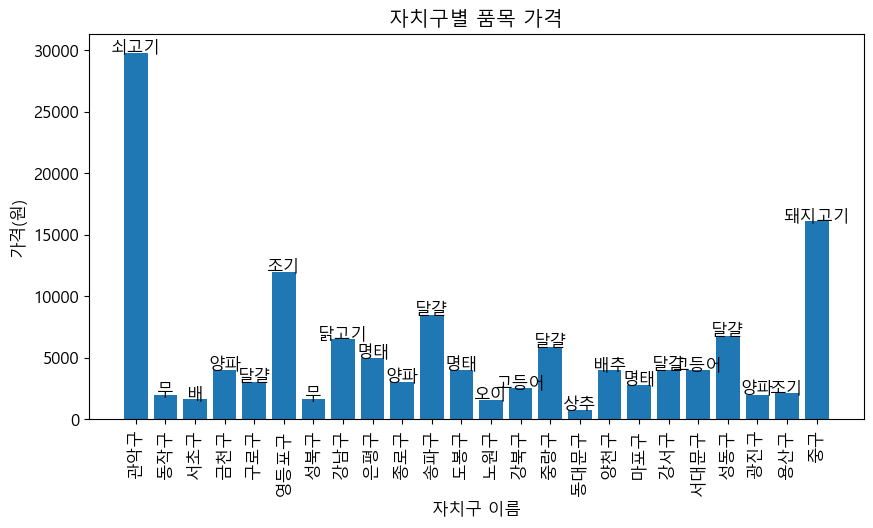

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'  
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rc('axes', unicode_minus=False)

df = pd.read_csv('./생필품 농수축산물 가격 정보(2021년).csv', encoding='cp949')


df['년도'] = df['년도-월'].str.split('-').str[0]
df['월'] = df['년도-월'].str.split('-').str[1]

df['년도'] = df['년도'].replace('2323', '2023')

df_selected = df[df['년도'] == '2021']

df_selected = df_selected[df_selected['가격(원)'] != 0]

df_selected = df_selected.sort_values(by='년도-월', ascending=False).groupby('자치구 이름').head(1)

df_selected['품목 이름'] = df_selected['품목 이름'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))

df_selected = df_selected[['자치구 이름', '품목 이름', '가격(원)']]

df_selected = df_selected[df_selected['자치구 이름'] != '강동구']

plt.figure(figsize=(10,5))
plt.bar(df_selected['자치구 이름'], df_selected['가격(원)'])

for i in range(len(df_selected)):
    plt.text(i, df_selected['가격(원)'].iloc[i], df_selected['품목 이름'].iloc[i], ha = 'center')

plt.xlabel('자치구 이름')
plt.ylabel('가격(원)')
plt.title('자치구별 품목 가격')
plt.xticks(rotation = 90)
plt.show()


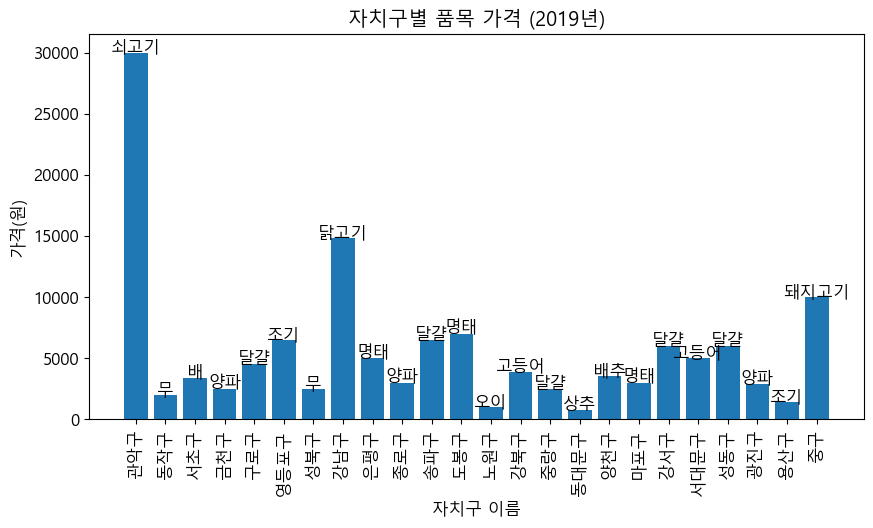

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df_2019 = pd.read_csv('./생필품 농수축산물 가격 정보(2019년).csv', encoding='cp949')

df_2019['년도'] = df_2019['년도-월'].str.split('-').str[0]
df_2019['월'] = df_2019['년도-월'].str.split('-').str[1]

df_selected_2019 = df_2019[df_2019['년도'] == '2019']

df_selected_2019['가격(원)'] = pd.to_numeric(df_selected_2019['가격(원)'], errors='coerce').fillna(0)

df_selected_2019 = df_selected_2019[df_selected_2019['가격(원)'] != 0]

df_selected_2019 = df_selected_2019.sort_values(by='년도-월', ascending=False).groupby('자치구 이름').head(1)

df_selected_2019['품목 이름'] = df_selected_2019['품목 이름'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))

df_selected_2019 = df_selected_2019.dropna(subset=['자치구 이름'])

ordered_gu_names = ['관악구', '동작구', '서초구', '금천구', '구로구', '영등포구', '성북구', 
                    '강남구', '은평구', '종로구', '송파구', '도봉구', '노원구', '강북구', '중랑구', '동대문구', 
                    '양천구', '마포구', '강서구', '서대문구', '성동구', '광진구', '용산구', '중구']

df_selected_2019['자치구 이름'] = pd.Categorical(df_selected_2019['자치구 이름'], categories=ordered_gu_names, ordered=True)
df_selected_2019 = df_selected_2019.sort_values('자치구 이름')

df_selected_2019 = df_selected_2019[['자치구 이름', '품목 이름', '가격(원)']]

df_selected_2019['자치구 이름'] = df_selected_2019['자치구 이름'].astype(str)

df_selected_2019['자치구 이름'].fillna('강동구', inplace=True)

df_selected_2019.loc[df_selected_2019['자치구 이름'] == '강동구', '품목 이름'] = '고등어'

ordered_item_names = ['쇠고기', '무', '배', '양파', '달걀', '조기', '무', '닭고기', '명태', '양파', '달걀', '명태', '오이', '고등어', '달걀', '상추', '배추', '명태', '달걀', '고등어', '달걀', '양파', '조기', '돼지고기']

# '자치구 이름'과 '품목 이름'에 따른 '가격(원)'을 찾아 매칭
for gu_name, item_name in zip(ordered_gu_names, ordered_item_names):
    # 해당 '자치구 이름'과 '품목 이름'이 있는지 확인
    if ((df_2019['자치구 이름'] == gu_name) & df_2019['품목 이름'].str.contains(item_name)).any():
        price = df_2019.loc[(df_2019['자치구 이름'] == gu_name) & (df_2019['품목 이름'].str.contains(item_name)), '가격(원)'].values[0]
        df_selected_2019.loc[df_selected_2019['자치구 이름'] == gu_name, '가격(원)'] = price
        df_selected_2019.loc[df_selected_2019['자치구 이름'] == gu_name, '품목 이름'] = item_name
    else:
        print(f"{gu_name}에 {item_name} 데이터가 없습니다.")


df_selected_2019 = df_selected_2019[df_selected_2019['자치구 이름'] != 'nan']

plt.figure(figsize=(10,5))
plt.bar(df_selected_2019['자치구 이름'], df_selected_2019['가격(원)'])

for i in range(len(df_selected_2019)):
    plt.text(i, df_selected_2019['가격(원)'].iloc[i], df_selected_2019['품목 이름'].iloc[i], ha = 'center')

plt.xlabel('자치구 이름')
plt.ylabel('가격(원)')
plt.title('자치구별 품목 가격 (2019년)')
plt.xticks(rotation = 90)
plt.show()




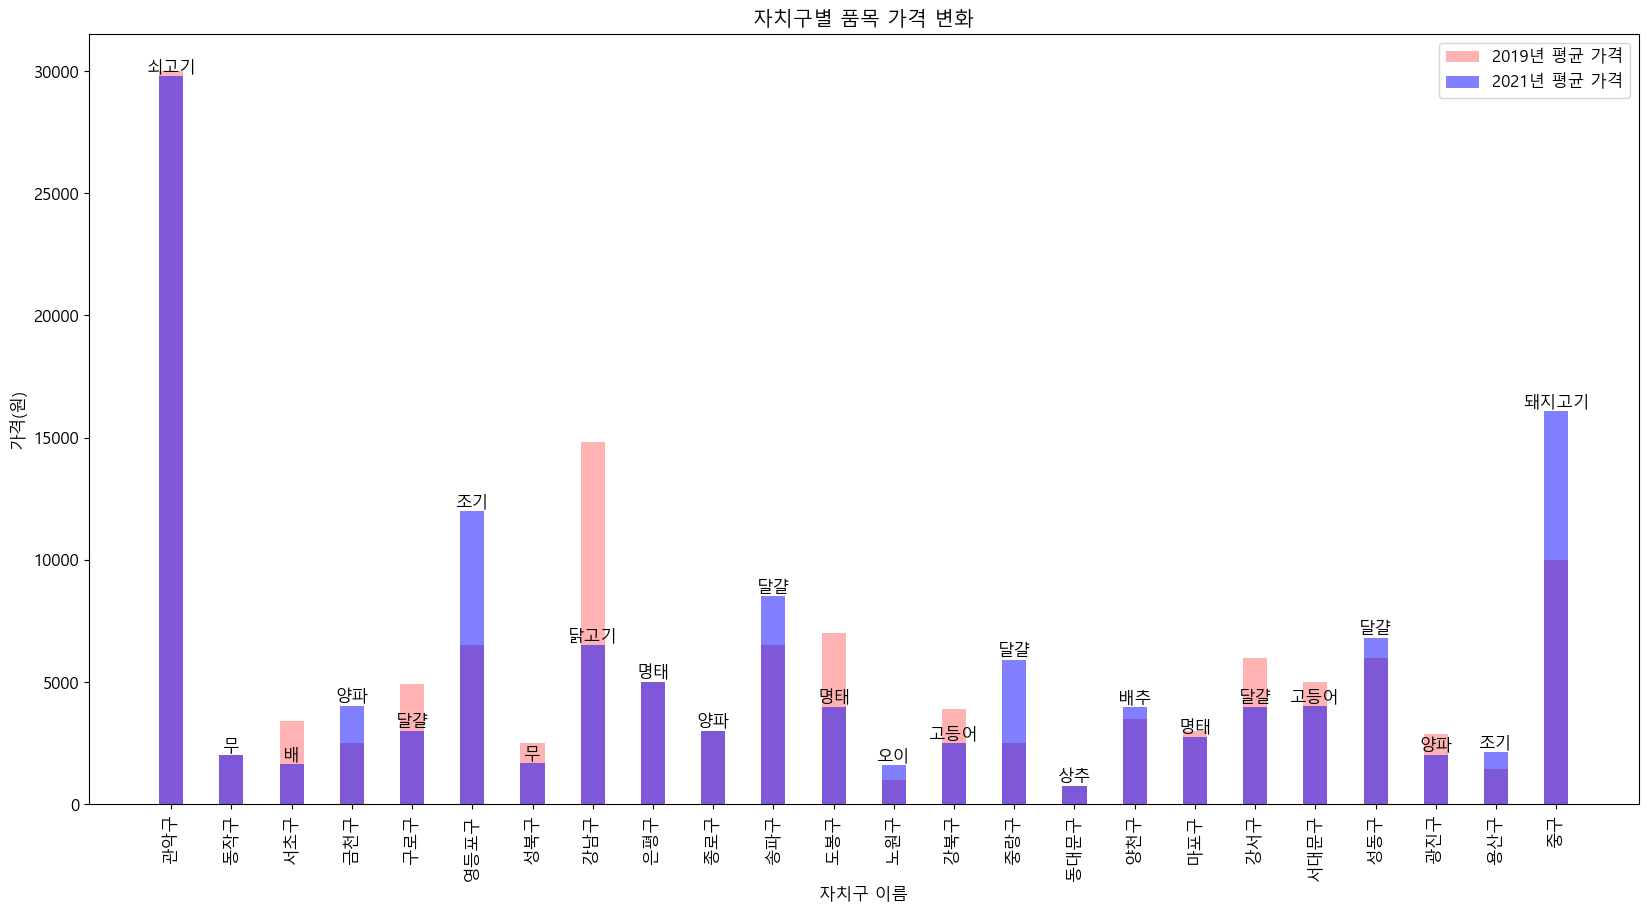

In [47]:

df_selected_2019['년도'] = '2019'
df_selected['년도'] = '2021'

df_selected_2019.loc[(df_selected_2019['자치구 이름'] == '구로구') & (df_selected_2019['품목 이름'] == '달걀'), '가격(원)'] = 4900

# 두데이터 병합
df_combined = pd.concat([df_selected, df_selected_2019])

df_grouped = df_combined.groupby(['자치구 이름', '년도'])['가격(원)'].mean().unstack()

ordered_gu_names = ['관악구', '동작구', '서초구', '금천구', '구로구', '영등포구', '성북구', 
                    '강남구', '은평구', '종로구', '송파구', '도봉구', '노원구', '강북구', '중랑구', '동대문구', 
                    '양천구', '마포구', '강서구', '서대문구', '성동구', '광진구', '용산구', '중구']

df_grouped = df_grouped.loc[ordered_gu_names]

item_names = ['쇠고기', '무', '배', '양파', '달걀', '조기', '무', '닭고기', '명태', '양파', '달걀', '명태', '오이', '고등어', '달걀', '상추', '배추', '명태', '달걀', '고등어', '달걀', '양파', '조기', '돼지고기']

plt.figure(figsize=(20,10))
bar_2019 = plt.bar(df_grouped.index, df_grouped['2019'], color='r', alpha=0.3, label='2019년 평균 가격', width=0.4)
bar_2021 = plt.bar(df_grouped.index, df_grouped['2021'], color='b', alpha=0.5, label='2021년 평균 가격', width=0.4)

for i, rect in enumerate(bar_2021):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, item_names[i], ha='center', va='bottom')

plt.legend()

plt.xlabel('자치구 이름')
plt.ylabel('가격(원)')
plt.title('자치구별 품목 가격 변화')
plt.xticks(rotation = 90)
plt.show()


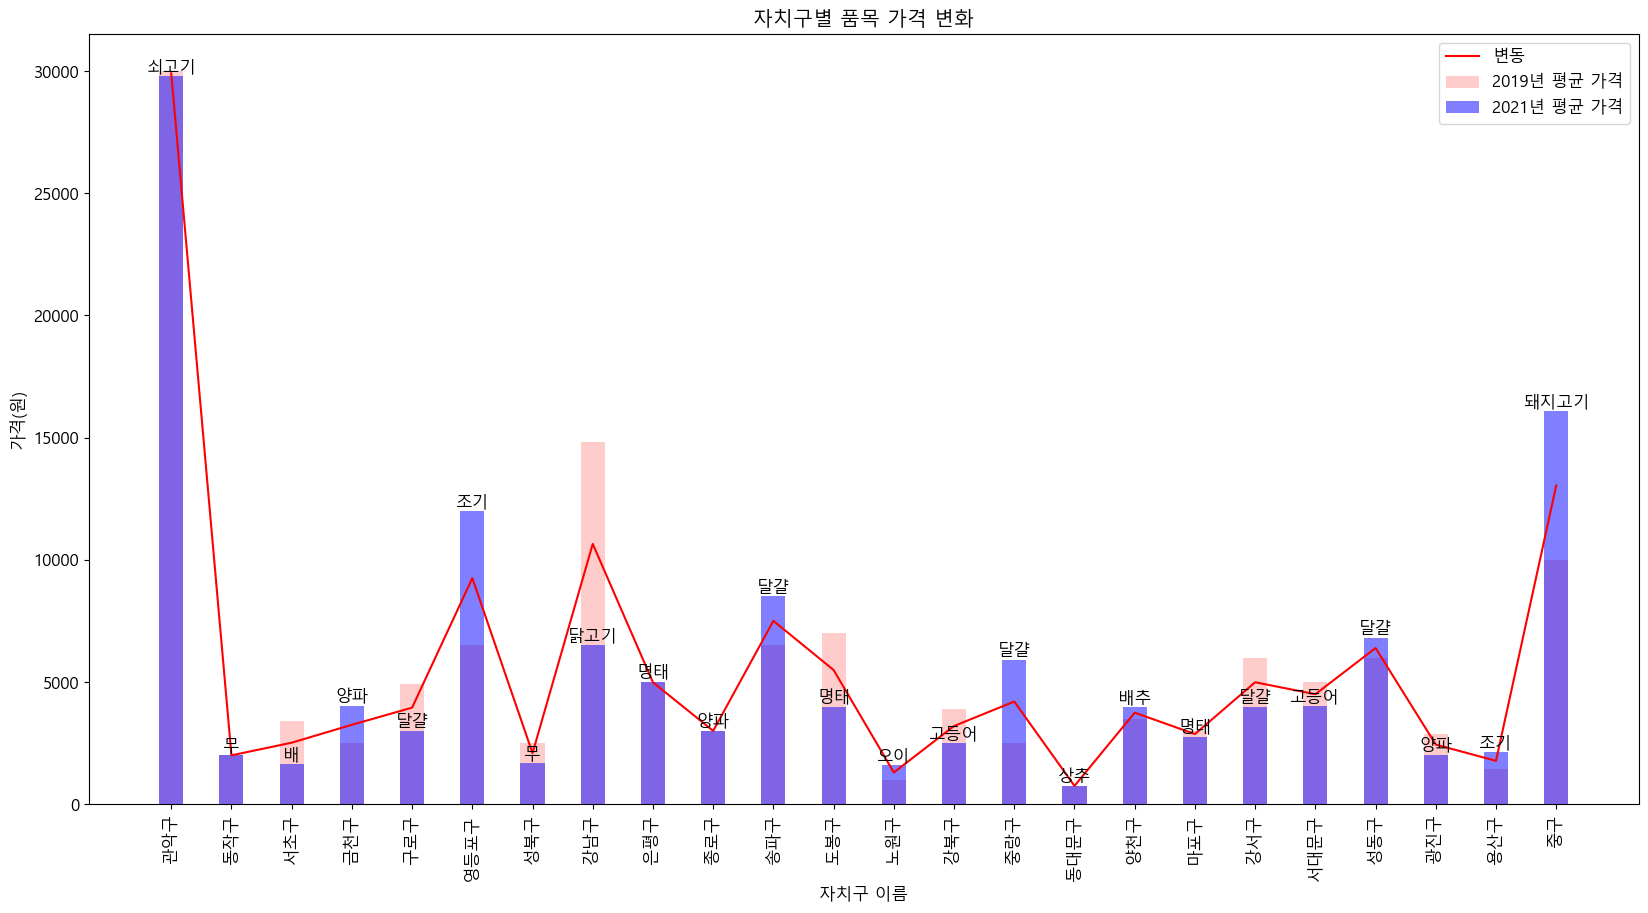

In [51]:
# '년도' 컬럼을 추가합니다.
df_selected_2019['년도'] = '2019'
df_selected['년도'] = '2021'

# '구로구'의 '달걀' 가격을 2019년 데이터에서 4900으로 변경합니다.
df_selected_2019.loc[(df_selected_2019['자치구 이름'] == '구로구') & (df_selected_2019['품목 이름'] == '달걀'), '가격(원)'] = 4900

# 두 데이터프레임을 병합합니다.
df_combined = pd.concat([df_selected, df_selected_2019])

# 자치구 이름별로 그룹화하여 각 연도의 평균 가격을 계산합니다.
df_grouped = df_combined.groupby(['자치구 이름', '년도'])['가격(원)'].mean().unstack()

# 원하는 순서를 설정합니다.
ordered_gu_names = ['관악구', '동작구', '서초구', '금천구', '구로구', '영등포구', '성북구', 
                    '강남구', '은평구', '종로구', '송파구', '도봉구', '노원구', '강북구', '중랑구', '동대문구', 
                    '양천구', '마포구', '강서구', '서대문구', '성동구', '광진구', '용산구', '중구']

# 순서를 적용합니다.
df_grouped = df_grouped.loc[ordered_gu_names]

# 품목 이름을 가져옵니다.
item_names = ['쇠고기', '무', '배', '양파', '달걀', '조기', '무', '닭고기', '명태', '양파', '달걀', '명태', '오이', '고등어', '달걀', '상추', '배추', '명태', '달걀', '고등어', '달걀', '양파', '조기', '돼지고기']

# 바 그래프를 그립니다.
plt.figure(figsize=(20,10))
bar_2019 = plt.bar(df_grouped.index, df_grouped['2019'], color='r', alpha=0.2, label='2019년 평균 가격', width=0.4)
bar_2021 = plt.bar(df_grouped.index, df_grouped['2021'], color='b', alpha=0.5, label='2021년 평균 가격', width=0.4)

# 각 자치구의 2019년과 2021년 평균 가격의 평균을 계산합니다.
df_grouped['평균'] = df_grouped.mean(axis=1)

# 평균 가격을 연결하는 선을 그립니다.
plt.plot(df_grouped.index, df_grouped['평균'], color='r', label='변동')

# 막대그래프 상단에 품목 이름을 표시합니다.
for i, rect in enumerate(bar_2021):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, item_names[i], ha='center', va='bottom')

# 범례를 추가합니다.
plt.legend()

plt.xlabel('자치구 이름')
plt.ylabel('가격(원)')
plt.title('자치구별 품목 가격 변화')
plt.xticks(rotation = 90)
plt.show()
